# Employee Attrition

**PROBLEM STATEMENT**

Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company.
 
Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
 

**Objective:**

- The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.

**Import the necessary libraries**

In [379]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style 
import seaborn as sns
import scipy as scipy
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

**Read the dataset**

In [380]:
df = pd.read_csv('Train_dataset_edited.csv')

In [381]:
print(df.Attrition.value_counts())
df.Attrition.value_counts(normalize=True)  

0    3735
1    1445
Name: Attrition, dtype: int64


0    0.721042
1    0.278958
Name: Attrition, dtype: float64

In [382]:
df_test = pd.read_csv('Test_dataset.csv')

In [383]:
df.shape

(5180, 22)

In [384]:
df_test.shape

(2630, 21)

In [385]:
df=df.drop('EmployeeID',axis=1)

## Necessary step for final Submission

In [386]:
test_file_ids = df_test['EmployeeID'] ## necessary step

In [387]:
df_test=df_test.drop(['EmployeeID'],axis=1)


## EDA

In [388]:
print(df.MaritalStatus.value_counts())
df.MaritalStatus.value_counts(normalize=True)  

Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64


Single      0.342857
Married     0.311583
Divorsed    0.196139
M           0.149421
Name: MaritalStatus, dtype: float64

In [389]:
print(df_test.MaritalStatus.value_counts())
df_test.MaritalStatus.value_counts(normalize=True)  

Single      933
Married     841
Divorsed    477
M           379
Name: MaritalStatus, dtype: int64


Single      0.354753
Married     0.319772
Divorsed    0.181369
M           0.144106
Name: MaritalStatus, dtype: float64

In [390]:
print(df.Gender.value_counts())
df.Gender.value_counts(normalize=True)  

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64


Male      0.602649
Female    0.260616
F         0.136735
Name: Gender, dtype: float64

In [391]:
print(df_test.Gender.value_counts())
df_test.Gender.value_counts(normalize=True) 

Male      1574
Female     682
F          344
Name: Gender, dtype: int64


Male      0.605385
Female    0.262308
F         0.132308
Name: Gender, dtype: float64

In [392]:
df.isnull().sum()

Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [393]:
df.isnull().sum() / df.shape[0] * 100

Attrition             0.000000
Age                   6.100386
TravelProfile         0.000000
Department            2.393822
HomeToWork            4.922780
EducationField        0.000000
Gender                0.888031
HourlnWeek            5.540541
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.733591
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    3.262548
WorkExperience        3.610039
LastPromotion         1.351351
CurrentProfile        6.003861
MaritalStatus         0.000000
MonthlyIncome         1.795367
dtype: float64

In [394]:
df_test.isnull().sum()

Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [395]:
df_test.isnull().sum() / df.shape[0] * 100

Age                   2.741313
TravelProfile         0.000000
Department            1.119691
HomeToWork            2.432432
EducationField        0.000000
Gender                0.579151
HourlnWeek            2.625483
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.579151
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    1.814672
WorkExperience        2.355212
LastPromotion         1.100386
CurrentProfile        2.586873
MaritalStatus         0.000000
MonthlyIncome         0.637066
dtype: float64

In [396]:
median1=df['Age'].median()
df['Age']=df['Age'].fillna(median1)
df_test.loc[df_test['Age'].isnull() == True,'Age'] = df_test['Age'].median()
median1
df_test['Age'].median()

36.0

In [397]:
median2=df['HomeToWork'].median()
df['HomeToWork']=df['HomeToWork'].fillna(median2)
df_test.loc[df_test['HomeToWork'].isnull() == True,'HomeToWork'] = df_test['HomeToWork'].median()
#median2
df_test['HomeToWork'].median()

9.0

In [398]:
median3=df['HourlnWeek'].median()
df['HourlnWeek']=df['HourlnWeek'].fillna(median3)
df_test.loc[df_test['HourlnWeek'].isnull() == True,'HourlnWeek'] = df_test['HourlnWeek'].median()
#median3
df_test['HourlnWeek'].median()

59.0

In [399]:
median4=df['SalaryHikelastYear'].median()
df['SalaryHikelastYear']=df['SalaryHikelastYear'].fillna(median4)
df_test.loc[df_test['SalaryHikelastYear'].isnull() == True,'SalaryHikelastYear'] = df_test['SalaryHikelastYear'].median()
#median4
df_test['SalaryHikelastYear'].median()

19.0

In [400]:
median5=df['WorkExperience'].median()
df['WorkExperience']=df['WorkExperience'].fillna(median5)
df_test.loc[df_test['WorkExperience'].isnull() == True,'WorkExperience'] = df_test['WorkExperience'].median()
#median5
df_test['WorkExperience'].median()

10.0

In [401]:
median6=df['LastPromotion'].median()
df['LastPromotion']=df['LastPromotion'].fillna(median6)
df_test.loc[df_test['LastPromotion'].isnull() == True,'LastPromotion'] = df_test['LastPromotion'].median()
median6
df_test['LastPromotion'].median()

1.0

In [402]:
median7=df['CurrentProfile'].median()
df['CurrentProfile']=df['CurrentProfile'].fillna(median7)
df_test.loc[df_test['CurrentProfile'].isnull() == True,'CurrentProfile'] = df_test['CurrentProfile'].median()
median7
df_test['CurrentProfile'].median()

3.0

In [403]:
median8=df['MonthlyIncome'].median()
df['MonthlyIncome']=df['MonthlyIncome'].fillna(median8)
df_test.loc[df_test['MonthlyIncome'].isnull() == True,'MonthlyIncome'] = df_test['MonthlyIncome'].median()
median8
df_test['MonthlyIncome'].median()

20332.0

In [404]:
df.loc[df['Department'].isnull() == True,'Department'] = df['Department'].mode()[0]
df_test.loc[df_test['Department'].isnull() == True,'Department'] = df_test['Department'].mode()[0]

In [405]:
df.loc[df['Gender'].isnull() == True,'Gender'] = df['Gender'].mode()[0]
df_test.loc[df_test['Gender'].isnull() == True,'Gender'] = df_test['Gender'].mode()[0]
df_test['Gender'].mode()

0    Male
dtype: object

In [406]:
df.loc[df['Designation'].isnull() == True,'Designation'] = df['Designation'].mode()[0]
df_test.loc[df_test['Designation'].isnull() == True,'Designation'] = df_test['Designation'].mode()[0]
df_test['Designation'].mode()

0    Executive
dtype: object

In [407]:
df.loc[df['Gender'] == 'F','Gender'] = 'Female'

In [408]:
df_test.loc[df_test['Gender'] == 'F','Gender'] = 'Female'

In [409]:
print(df.Gender.value_counts())
df.Gender.value_counts(normalize=True) 

Male      3140
Female    2040
Name: Gender, dtype: int64


Male      0.606178
Female    0.393822
Name: Gender, dtype: float64

In [410]:
print(df_test.Gender.value_counts())
df_test.Gender.value_counts(normalize=True) 

Male      1604
Female    1026
Name: Gender, dtype: int64


Male      0.609886
Female    0.390114
Name: Gender, dtype: float64

In [411]:
df.loc[df['MaritalStatus'] == 'M','MaritalStatus'] = 'Married'

In [412]:
df_test.loc[df_test['MaritalStatus'] == 'M','MaritalStatus'] = 'Married'

In [413]:
print(df.MaritalStatus.value_counts())
df.MaritalStatus.value_counts(normalize=True) 

Married     2388
Single      1776
Divorsed    1016
Name: MaritalStatus, dtype: int64


Married     0.461004
Single      0.342857
Divorsed    0.196139
Name: MaritalStatus, dtype: float64

In [414]:
print(df_test.MaritalStatus.value_counts())
df_test.MaritalStatus.value_counts(normalize=True) 

Married     1220
Single       933
Divorsed     477
Name: MaritalStatus, dtype: int64


Married     0.463878
Single      0.354753
Divorsed    0.181369
Name: MaritalStatus, dtype: float64

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   int64  
 1   Age                 5180 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5180 non-null   object 
 4   HomeToWork          5180 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5180 non-null   object 
 7   HourlnWeek          5180 non-null   float64
 8   Involvement         5180 non-null   int64  
 9   WorkLifeBalance     5180 non-null   int64  
 10  Designation         5180 non-null   object 
 11  JobSatisfaction     5180 non-null   int64  
 12  ESOPs               5180 non-null   int64  
 13  NumCompaniesWorked  5180 non-null   int64  
 14  OverTime            5180 non-null   int64  
 15  SalaryHikelastYear  5180 non-null   float64
 16  WorkEx

In [416]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2630 non-null   float64
 1   TravelProfile       2630 non-null   object 
 2   Department          2630 non-null   object 
 3   HomeToWork          2630 non-null   float64
 4   EducationField      2630 non-null   object 
 5   Gender              2630 non-null   object 
 6   HourlnWeek          2630 non-null   float64
 7   Involvement         2630 non-null   int64  
 8   WorkLifeBalance     2630 non-null   int64  
 9   Designation         2630 non-null   object 
 10  JobSatisfaction     2630 non-null   int64  
 11  ESOPs               2630 non-null   int64  
 12  NumCompaniesWorked  2630 non-null   int64  
 13  OverTime            2630 non-null   int64  
 14  SalaryHikelastYear  2630 non-null   float64
 15  WorkExperience      2630 non-null   float64
 16  LastPr

In [417]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,5180.0,0.278958,0.448530,0.0,0.0,0.0,1.0,1.0
Age,5180.0,37.040927,8.965977,18.0,31.0,36.0,42.0,61.0
HomeToWork,5180.0,11.003668,8.257384,1.0,5.0,9.0,15.0,121.0
HourlnWeek,5180.0,58.036293,12.633586,10.0,50.0,59.0,67.0,99.0
Involvement,5180.0,3.226641,0.872431,1.0,3.0,3.0,4.0,5.0
WorkLifeBalance,5180.0,3.012741,1.410602,1.0,2.0,3.0,4.0,5.0
JobSatisfaction,5180.0,3.144402,1.342776,1.0,2.0,3.0,4.0,5.0
ESOPs,5180.0,0.490541,0.499959,0.0,0.0,0.0,1.0,1.0
NumCompaniesWorked,5180.0,3.157336,2.606036,0.0,1.0,2.0,5.0,21.0
OverTime,5180.0,0.313514,0.463966,0.0,0.0,0.0,1.0,1.0


In [418]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2630.0,37.348669,9.107140,18.0,31.00,36.0,43.00,61.0
HomeToWork,2630.0,11.311787,8.649252,1.0,5.00,9.0,16.00,123.0
HourlnWeek,2630.0,57.922053,12.890105,12.0,50.00,59.0,67.00,110.0
Involvement,2630.0,3.239544,0.884138,1.0,3.00,3.0,4.00,5.0
WorkLifeBalance,2630.0,3.069202,1.416552,1.0,2.00,3.0,4.00,5.0
JobSatisfaction,2630.0,3.115589,1.337760,1.0,2.00,3.0,4.00,5.0
ESOPs,2630.0,0.504943,0.500071,0.0,0.00,1.0,1.00,1.0
NumCompaniesWorked,2630.0,3.222814,2.663692,0.0,1.00,2.0,5.00,20.0
OverTime,2630.0,0.330038,0.470316,0.0,0.00,0.0,1.00,1.0
SalaryHikelastYear,2630.0,20.578327,3.670913,16.0,18.00,19.0,23.00,31.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


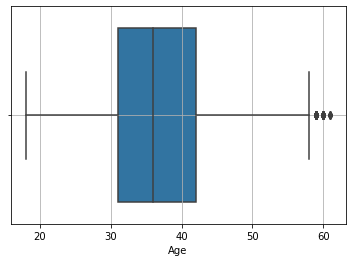

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


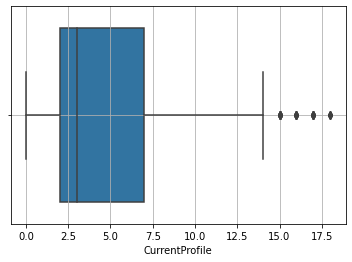

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


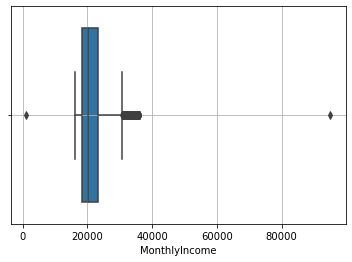

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


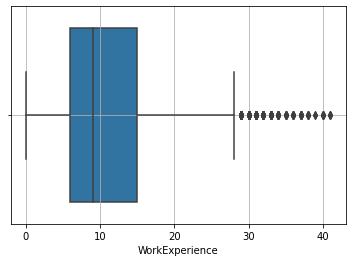

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


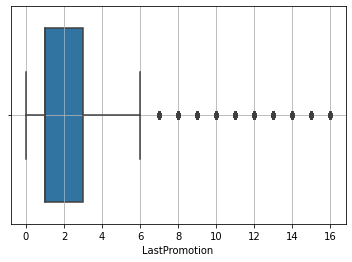

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


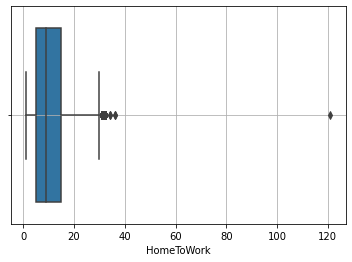

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


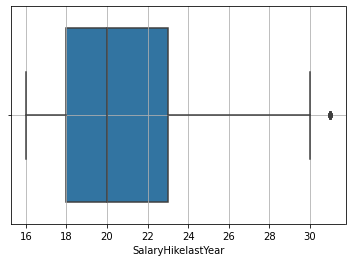

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


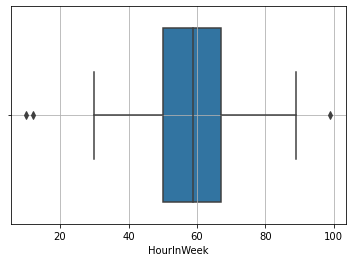

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


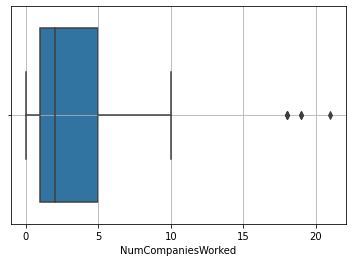

In [430]:
cols = ['Age','CurrentProfile','MonthlyIncome','WorkExperience','LastPromotion','HomeToWork','SalaryHikelastYear','HourlnWeek','NumCompaniesWorked']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [431]:
#def remove_outlier(col):
#    Q1,Q3=col.quantile([0.25,0.75])
#    IQR=Q3-Q1
#    lower_range= Q1-(1.5 * IQR)
#    upper_range= Q3+(1.5 * IQR)
#    return lower_range, upper_range 

In [432]:
#for column in df[cols].columns:
#    lr,ur=remove_outlier(df[column])
#    df[column]=np.where(df[column]>ur,ur,df[column])
#    df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


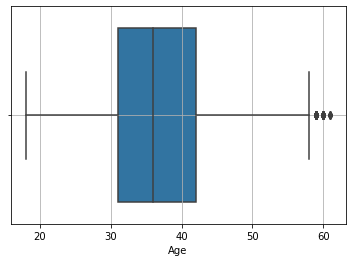

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


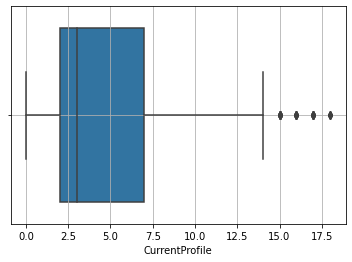

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


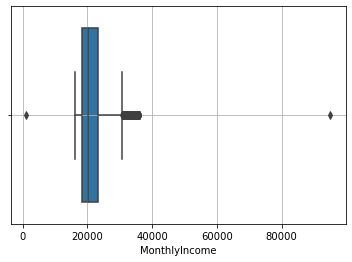

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


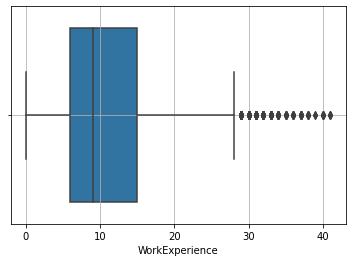

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


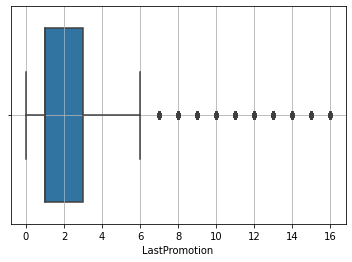

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


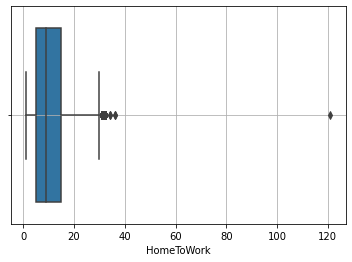

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


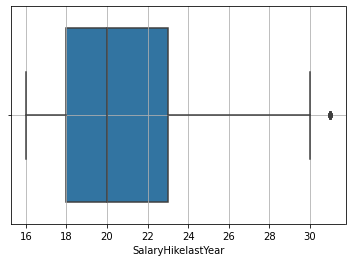

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


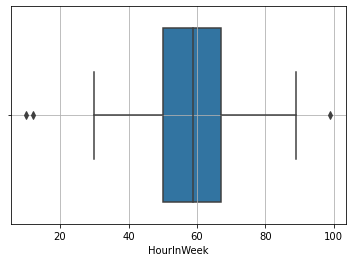

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


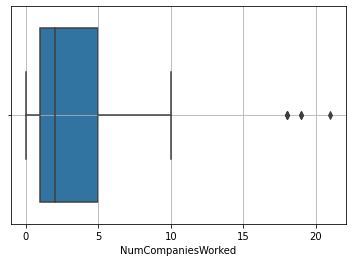

In [434]:
cols = ['Age','CurrentProfile','MonthlyIncome','WorkExperience','LastPromotion','HomeToWork','SalaryHikelastYear','HourlnWeek','NumCompaniesWorked']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   int64  
 1   Age                 5180 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5180 non-null   object 
 4   HomeToWork          5180 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5180 non-null   object 
 7   HourlnWeek          5180 non-null   float64
 8   Involvement         5180 non-null   int64  
 9   WorkLifeBalance     5180 non-null   int64  
 10  Designation         5180 non-null   object 
 11  JobSatisfaction     5180 non-null   int64  
 12  ESOPs               5180 non-null   int64  
 13  NumCompaniesWorked  5180 non-null   int64  
 14  OverTime            5180 non-null   int64  
 15  SalaryHikelastYear  5180 non-null   float64
 16  WorkEx

In [436]:
#sns.pairplot(df)

In [439]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')                  

TRAVELPROFILE :  3
No         492
Yes       1051
Rarely    3637
Name: TravelProfile, dtype: int64


DEPARTMENT :  3
Marketing     222
Sales        1615
Analytics    3343
Name: Department, dtype: int64


EDUCATIONFIELD :  6
MBA                   117
Other                 284
Engineer              487
Marketing Diploma     603
CA                   1560
Statistics           2129
Name: EducationField, dtype: int64


GENDER :  2
Female    2040
Male      3140
Name: Gender, dtype: int64


DESIGNATION :  5
VP                 223
AVP                328
Senior Manager     763
Manager           1756
Executive         2110
Name: Designation, dtype: int64


MARITALSTATUS :  3
Divorsed    1016
Single      1776
Married     2388
Name: MaritalStatus, dtype: int64




In [440]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print(column.upper(),': ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n') 

TRAVELPROFILE :  3
No         249
Yes        529
Rarely    1852
Name: TravelProfile, dtype: int64


DEPARTMENT :  3
Marketing     105
Sales         792
Analytics    1733
Name: Department, dtype: int64


EDUCATIONFIELD :  6
MBA                    34
Other                 145
Engineer              263
Marketing Diploma     291
CA                    857
Statistics           1040
Name: EducationField, dtype: int64


GENDER :  2
Female    1026
Male      1604
Name: Gender, dtype: int64


DESIGNATION :  5
VP                 117
AVP                179
Senior Manager     391
Manager            920
Executive         1023
Name: Designation, dtype: int64


MARITALSTATUS :  3
Divorsed     477
Single       933
Married     1220
Name: MaritalStatus, dtype: int64




## Encoding

In [441]:
df['EducationField']=np.where(df['EducationField'] =='Statistics', '3', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='CA', '4', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Marketing Diploma', '2', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Engineer', '0', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Other', '5', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='MBA', '1', df['EducationField'])
df['EducationField'] = df['EducationField'].astype('int64') 
# 4,5,3,1,6,2

In [442]:
df_test['EducationField']=np.where(df_test['EducationField'] =='Statistics', '3', df_test['EducationField'])
df_test['EducationField']=np.where(df_test['EducationField'] =='CA', '4', df_test['EducationField'])
df_test['EducationField']=np.where(df_test['EducationField'] =='Marketing Diploma', '2', df_test['EducationField'])
df_test['EducationField']=np.where(df_test['EducationField'] =='Engineer', '0', df_test['EducationField'])
df_test['EducationField']=np.where(df_test['EducationField'] =='Other', '5', df_test['EducationField'])
df_test['EducationField']=np.where(df_test['EducationField'] =='MBA', '1', df_test['EducationField'])
df_test['EducationField'] = df_test['EducationField'].astype('int64') 

In [443]:
df['Designation']=np.where(df['Designation'] =='VP', '1', df['Designation'])
df['Designation']=np.where(df['Designation'] =='AVP', '0', df['Designation'])
df['Designation']=np.where(df['Designation'] =='Senior Manager', '3', df['Designation'])
df['Designation']=np.where(df['Designation'] =='Manager', '2', df['Designation'])
df['Designation']=np.where(df['Designation'] =='Executive', '4', df['Designation'])
df['Designation'] = df['Designation'].astype('int64') 
# 2,1,4,3,5

In [444]:
df_test['Designation']=np.where(df_test['Designation'] =='VP', '1', df_test['Designation'])
df_test['Designation']=np.where(df_test['Designation'] =='AVP', '0', df_test['Designation'])
df_test['Designation']=np.where(df_test['Designation'] =='Senior Manager', '3', df_test['Designation'])
df_test['Designation']=np.where(df_test['Designation'] =='Manager', '2', df_test['Designation'])
df_test['Designation']=np.where(df_test['Designation'] =='Executive', '4', df_test['Designation'])
df_test['Designation'] = df_test['Designation'].astype('int64') 

In [445]:
df['TravelProfile']=np.where(df['TravelProfile'] =='Rarely', '0', df['TravelProfile'])
df['TravelProfile']=np.where(df['TravelProfile'] =='Yes', '2', df['TravelProfile'])
df['TravelProfile']=np.where(df['TravelProfile'] =='No', '1', df['TravelProfile'])
df['TravelProfile'] = df['TravelProfile'].astype('int64') 
# 1,3,2

In [446]:
df_test['TravelProfile']=np.where(df_test['TravelProfile'] =='Rarely', '0', df_test['TravelProfile'])
df_test['TravelProfile']=np.where(df_test['TravelProfile'] =='Yes', '2', df_test['TravelProfile'])
df_test['TravelProfile']=np.where(df_test['TravelProfile'] =='No', '1', df_test['TravelProfile'])
df_test['TravelProfile'] = df_test['TravelProfile'].astype('int64') 

In [447]:
df['Department']=np.where(df['Department'] =='Analytics', '0', df['Department'])
df['Department']=np.where(df['Department'] =='Sales', '2', df['Department'])
df['Department']=np.where(df['Department'] =='Marketing', '1', df['Department'])
df['Department'] = df['Department'].astype('int64') 
# 1,3,2

In [448]:
df_test['Department']=np.where(df_test['Department'] =='Analytics', '0', df_test['Department'])
df_test['Department']=np.where(df_test['Department'] =='Sales', '2', df_test['Department'])
df_test['Department']=np.where(df_test['Department'] =='Marketing', '1', df_test['Department'])
df_test['Department'] = df_test['Department'].astype('int64') 

In [449]:
df['Gender']=np.where(df['Gender'] =='Male', '1', df['Gender'])
df['Gender']=np.where(df['Gender'] =='Female', '0', df['Gender'])
df['Gender'] = df['Gender'].astype('int64')

In [450]:
df_test['Gender']=np.where(df_test['Gender'] =='Male', '1', df_test['Gender'])
df_test['Gender']=np.where(df_test['Gender'] =='Female', '0', df_test['Gender'])
df_test['Gender'] = df_test['Gender'].astype('int64')

In [451]:
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Single', '2', df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Divorsed', '1', df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Married', '0', df['MaritalStatus'])
df['MaritalStatus'] = df['MaritalStatus'].astype('int64') 

In [452]:
df_test['MaritalStatus']=np.where(df_test['MaritalStatus'] =='Single', '2', df_test['MaritalStatus'])
df_test['MaritalStatus']=np.where(df_test['MaritalStatus'] =='Divorsed', '1', df_test['MaritalStatus'])
df_test['MaritalStatus']=np.where(df_test['MaritalStatus'] =='Married', '0', df_test['MaritalStatus'])
df_test['MaritalStatus'] = df_test['MaritalStatus'].astype('int64')
# 3,2,1

In [459]:
corr=df.corr()

<AxesSubplot:>

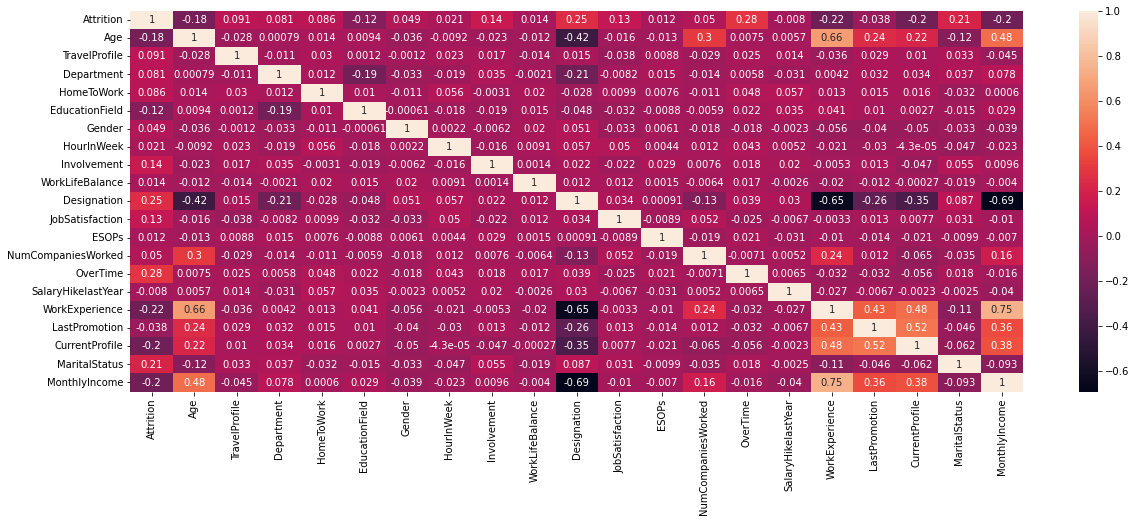

In [460]:
plt.figure(figsize=(20,7))
sns.heatmap(corr,annot=True)

In [461]:
df.shape

(5180, 21)

## Model Building

In [462]:
# Copy all the predictor variables into X dataframe
X = df.drop(['Attrition','MonthlyIncome','CurrentProfile'],axis=1) 
# Copy target into the y dataframe. 
y = df[['Attrition']]

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [464]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4662, 18), (4662, 1), (518, 18), (518, 1))

In [1]:
#corr=X.corr()
#plt.figure(figsize=(20,7))
#sns.heatmap(corr,annot=True)

In [469]:
df.columns

Index(['Attrition', 'Age', 'TravelProfile', 'Department', 'HomeToWork',
       'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

# XGB

In [475]:
#pip install xgboost

In [476]:
# Boosting Algorithm Libraries, max_depth=12
import xgboost as xgboost
from xgboost import XGBClassifier
#model=XGBClassifier(random_state=1,n_estimators=500,max_depth=6,base_score=0.5)
model=XGBClassifier(n_estimators=500,max_depth=6,base_score=0.5)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [477]:
# Prediction on the training and test set
ytrain_predict = model.predict(X_train) 
ytest_predict = model.predict(X_test) 

In [478]:
# Accuracy - Tainr Data
model.score(X_train, y_train)

1.0

In [479]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9884169884169884

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       378
           1       0.97      0.99      0.98       140

    accuracy                           0.99       518
   macro avg       0.98      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518
 



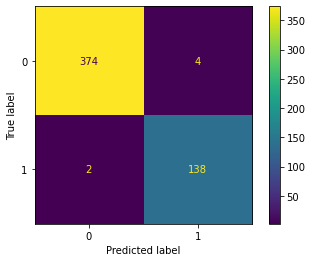

In [480]:
## Confusion matrix on the test data
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 1.000


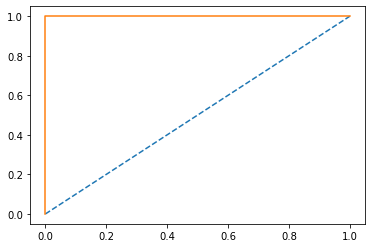

In [481]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


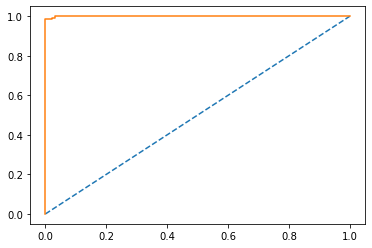

In [482]:
# predict probabilities
probs = model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# RF

In [484]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp/ipykernel_10708/2892489633.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [485]:
full_model=RandomForestClassifier(n_estimators=500) 
full_model.fit(X,y)

C:\Users\User\AppData\Local\Temp/ipykernel_10708/167644313.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  full_model.fit(X,y)


RandomForestClassifier(n_estimators=500)

In [486]:
# Prediction on the training and test set with cut off 0.5
ytrain_predict = model.predict(X_train) 
ytest_predict = model.predict(X_test) 

In [487]:
#ytrain_predict_prob = model.predict_proba(X_train) 
#ytest_predict_prob = model.predict_proba(X_test) 

In [488]:
# Accuracy - Tainr Data
model.score(X_train, y_train)

1.0

In [489]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9961389961389961

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       378
           1       1.00      0.99      0.99       140

    accuracy                           1.00       518
   macro avg       1.00      0.99      1.00       518
weighted avg       1.00      1.00      1.00       518
 



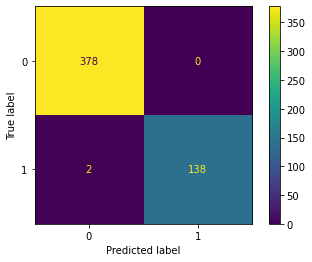

In [490]:
## Confusion matrix on the test data
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## NN

In [109]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [110]:
# Prediction on the training and test set
ytrain_predict = model.predict(X_train) 
ytest_predict = model.predict(X_test) 

In [111]:
# Accuracy - Tainr Data
model.score(X_train, y_train)

0.8951093951093951

In [112]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8513513513513513

## Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [502]:
# Prediction on the training and test set
ytrain_predict = model.predict(X_train) 
ytest_predict = model.predict(X_test) 

In [503]:
# Accuracy - Tainr Data
model.score(X_train, y_train)

0.7975117975117975

In [504]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8359073359073359

## LDA

In [505]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [506]:
# Prediction on the training and test set
ytrain_predict = model.predict(X_train) 
ytest_predict = model.predict(X_test) 

In [507]:
# Accuracy - Tainr Data
model.score(X_train, y_train)

0.796010296010296

In [508]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.833976833976834

## Submission

In [1]:
df_test=df_test.drop(['MonthlyIncome','CurrentProfile'],axis=1)

In [1813]:
df_test.shape

(2630, 18)

In [1814]:
final_predictions = full_model.predict(df_test)
final_predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1815]:
submission=pd.DataFrame([test_file_ids,final_predictions]).T

In [1816]:
submission.rename(columns={"Unnamed 0": "Attrition"},inplace=True)

In [1817]:
submission

,EmployeeID,Attrition
0,6110001,1
1,6110002,0
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,0
2626,6112627,0
2627,6112628,0
2628,6112629,1


In [1818]:
submission.to_csv('submission21.csv',index = False)